In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-prediction/features.csv
/kaggle/input/sales-prediction/stores.csv
/kaggle/input/sales-prediction/train.csv
/kaggle/input/sales-prediction/test.csv


## Step 1: Importing the Relevant Libraries

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Step 2: Data Inspection

In [104]:
stores = pd.read_csv('../input/sales-prediction/stores.csv')
train = pd.read_csv('../input/sales-prediction/train.csv')
test = pd.read_csv('../input/sales-prediction/test.csv')
features = pd.read_csv('../input/sales-prediction/features.csv')

In [105]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [106]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [107]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [108]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [109]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [112]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


#### Converting Date to datetime 

In [113]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

#### Label Encoding

In [114]:
features['IsHoliday'] = LabelEncoder().fit_transform(features['IsHoliday'])
train['IsHoliday'] = LabelEncoder().fit_transform(train['IsHoliday'])
test['IsHoliday'] = LabelEncoder().fit_transform(test['IsHoliday'])

#### Merging data

In [115]:
df_store_features_train = pd.merge(train,stores,how = 'inner',on='Store')

df_store_features_test = pd.merge(test,stores,how = 'inner',on='Store')

print("Shape of dataframe after merging Train & Stores : ",df_store_features_train.shape[0])

Shape of dataframe after merging Train & Stores :  421570


In [116]:
df_train = pd.merge(df_store_features_train,features,how='inner',on=['Store','Date','IsHoliday'])

df_test = pd.merge(df_store_features_test,features,how='inner', on=['Store','Date','IsHoliday'])

print("Shape of dataframe after merging Train, Stores and Feature : ",df_train.shape[0])

Shape of dataframe after merging Train, Stores and Feature :  421570


In [117]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [119]:
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  int64         
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     114915 non-null  float64       
 9   MarkDown2     86437 non-null   float64       
 10  MarkDown3     105235 non-null  float64       
 11  MarkDown4     102176 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  76902 non-null   float64       
dtypes: datetime64[ns]

In [121]:
df_train.shape, df_test.shape

((421570, 16), (115064, 15))

#### Missing Values

In [122]:
#ratio of null values
df_train.isnull().sum()/df_train.shape[0] *100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

In [123]:
#ratio of null values
df_test.isnull().sum()/df_test.shape[0] *100

Store            0.000000
Dept             0.000000
Date             0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
dtype: float64

In [124]:
#categorical features
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 14


In [125]:
#categorical features
categorical = df_test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= df_test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 1
Numerical Features in Test Set: 13


## Step 3: Data Cleaning

In [126]:
df_train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [127]:
df_train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = df_train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [128]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [129]:
df_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

#### Filling missing values

In [130]:
df_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4']] = df_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4']].fillna(0)

In [131]:
df_test.CPI.fillna(df_test.CPI.mean(),inplace=True)
df_test.Unemployment.fillna(df_test.Unemployment.mean(),inplace=True)

In [132]:
df_test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [133]:
import datetime as dt
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Week']= df_train['Date'].dt.week
df_train['Day']= df_train['Date'].dt.day
df_train.columns

# For test
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Week']= df_test['Date'].dt.week
df_test['Day']= df_test['Date'].dt.day

In [134]:
df_group = df_train[['Year','Dept','Weekly_Sales']].groupby(['Year','Dept']).mean().reset_index()
df_group.head()

,Year,Dept,Weekly_Sales
0,2010,1,19834.969620
1,2010,2,43543.024713
2,2010,3,11616.267167
3,2010,4,25730.225718
4,2010,5,24711.963623


## Step 4: Exploratory Data Analysis

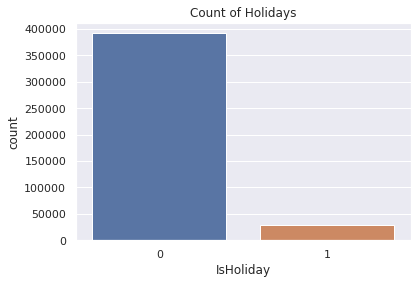

In [135]:
plt.title('Count of Holidays')
sns.countplot(df_train['IsHoliday'])
plt.show()

In [136]:
def annotate_horizontal(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                       
                   xytext = (0, 9), 
                   textcoords = 'offset points')
        
def annotate_vertical(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                    rotation=90  ,
                   xytext = (0, 4), 
                   textcoords = 'offset points')

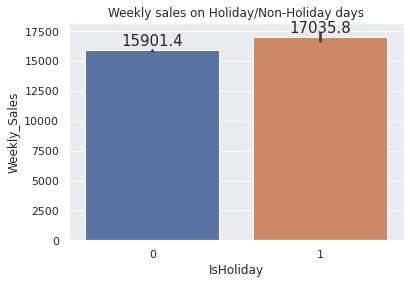

In [137]:
plt.title("Weekly sales on Holiday/Non-Holiday days")
splot=sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df_train)
annotate_horizontal(splot)

In [138]:
print("Average weekly_sales on a Holiday weekend is : {:.2f}". format(np.mean(df_train['Weekly_Sales'][(df_train['IsHoliday']==True)])))
print("Average weekly_sales on a non Holiday weekend is : {:.2f}". format(np.mean(df_train['Weekly_Sales'][(df_train['IsHoliday']==False)])))

Average weekly_sales on a Holiday weekend is : 17035.82
Average weekly_sales on a non Holiday weekend is : 15901.45


#### Observation:

1. Sales in Holiday weekes is ~8% higher than non Holiday weeks.

<AxesSubplot:title={'center':'Weekly_sales box plt'}, xlabel='Weekly_Sales'>

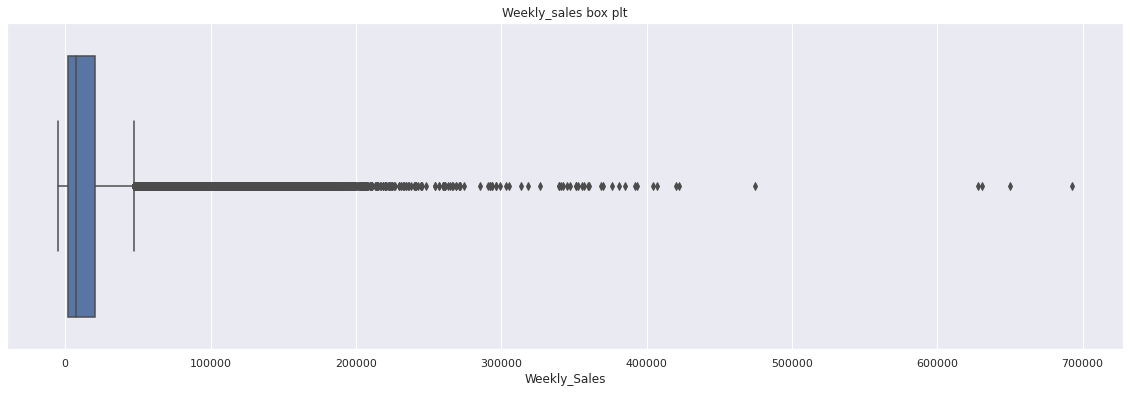

In [139]:
plt.figure(figsize=(20,6))
plt.title("Weekly_sales box plt")
sns.boxplot(df_train['Weekly_Sales'])

#### Observation:

1. Most of the sales are in the range of 10k-40k. The highest being >600k which might be during the special days and Holidays. 

In [140]:
df_train.loc[df_train['Weekly_Sales']>600000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
90645,10,72,2010-11-26,693099.36,1,B,126512,55.33,3.162,0.00,0.0,0.00,0.00,0.00,126.669267,9.003,2010,11,47,26
94393,10,72,2011-11-25,630999.19,1,B,126512,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,2011,11,47,25
333594,35,72,2010-11-26,627962.93,1,B,103681,46.67,3.039,0.00,0.0,0.00,0.00,0.00,136.689571,8.763,2010,11,47,26
337053,35,72,2011-11-25,649770.18,1,B,103681,47.88,3.492,1333.24,0.0,58563.24,20.97,6386.86,140.421786,8.745,2011,11,47,25


#### Observation:

1. These are the 4 days data where the sales are higher than 600k. And these corresponds to ThanksGiving day in different stores in the dept 72.

In [141]:
for i in range(90,100):
    print(np.percentile(df_train['Weekly_Sales'],i))

42845.673000000046
45630.06980000002
48745.45440000006
52288.85070000007
56461.394400000005
61201.951
67360.3836
74898.70719999998
85371.96579999998
106479.58599999998


In [142]:
for i in np.arange(99,100,0.1):
    print(np.percentile(df_train['Weekly_Sales'],i))

106479.58599999998
109686.70293000009
113083.82927999971
117354.39927999896
123275.63093999907
130447.86984999855
138536.5379999991
147565.68182999536
157664.16793999056
174882.0795999971


#### Observation:

1. 99% of the sales are within the range of 170k. And very few days has crossed the range of 200k being the special holidays. 

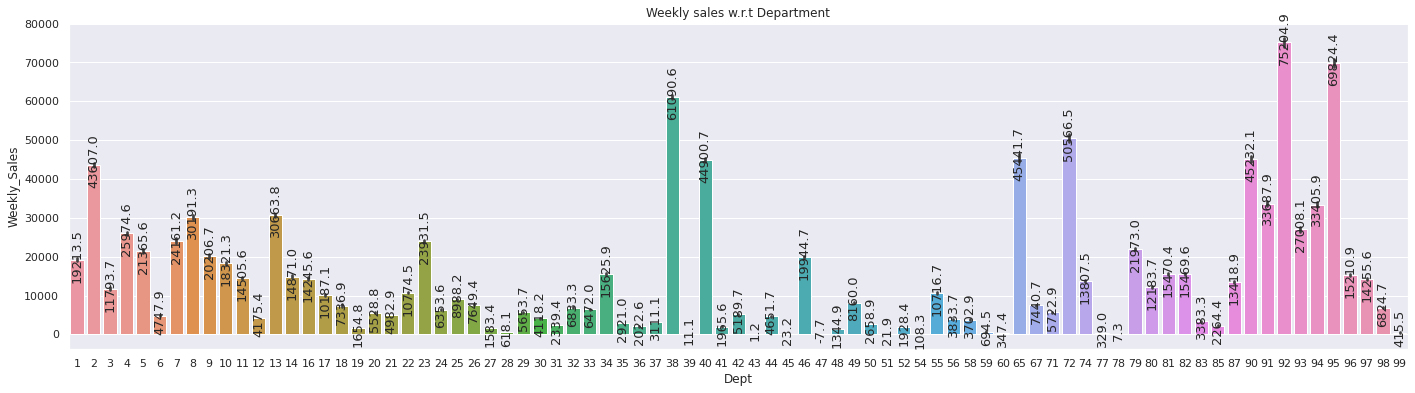

In [143]:
plt.figure(figsize=(24,6))
plt.title("Weekly sales w.r.t Department")
splot=sns.barplot(x='Dept', y='Weekly_Sales', data=df_train)
annotate_vertical(splot)

In [144]:
df_train['Weekly_Sales'].loc[df_train['Dept']==43].sum()

14.32

In [145]:
df_train['Weekly_Sales'].loc[df_train['Dept']==92].sum()

483943341.87

#### Observation:

1. Dept 92 has the highest recorded weekly sales with 483 Million $ followed by 95 and 38 departments. 
2. Few of the departments has very low weekly sales records like 43, 47 etc.

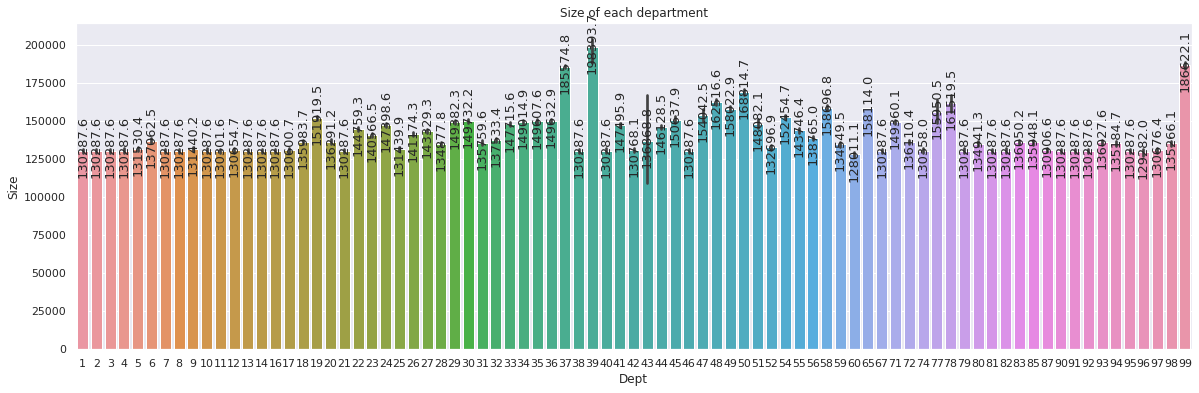

In [146]:
plt.figure(figsize=(20,6))
plt.title("Size of each department")
splot=sns.barplot(x='Dept', y='Size', data=df_train)
annotate_vertical(splot)

#### Observation:

1. Department size is almost equal for all, though the dept 92,95,38 has highest sales.
2. This may be because of the cost of items in these depts. 
3. We can conclude that dept size is not proportional to the weekly sales. 

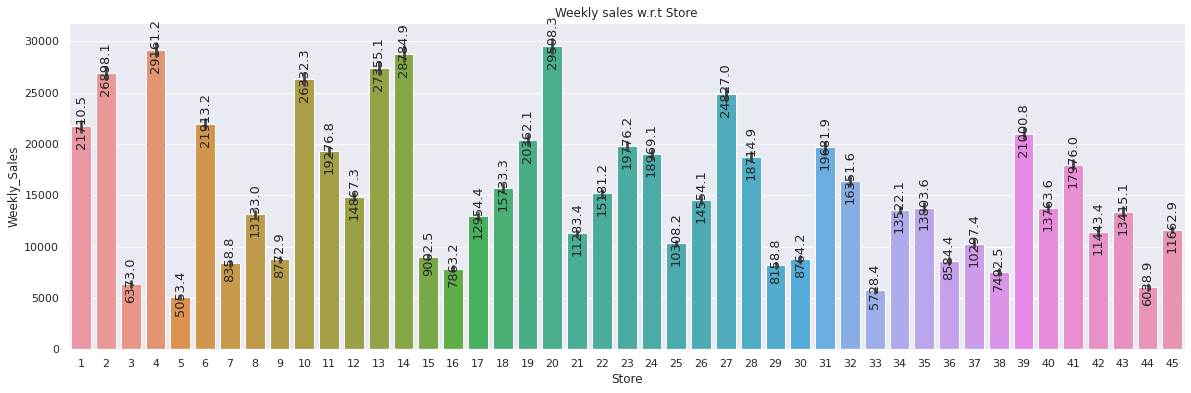

In [147]:
plt.figure(figsize=(20,6))
plt.title("Weekly sales w.r.t Store")
splot=sns.barplot(x='Store', y='Weekly_Sales', data=df_train)
annotate_vertical(splot)

#### Observation:

1. In particular store 20,14,13,4,2 has the highest weekly sales and this may be due to the location of the stores.  

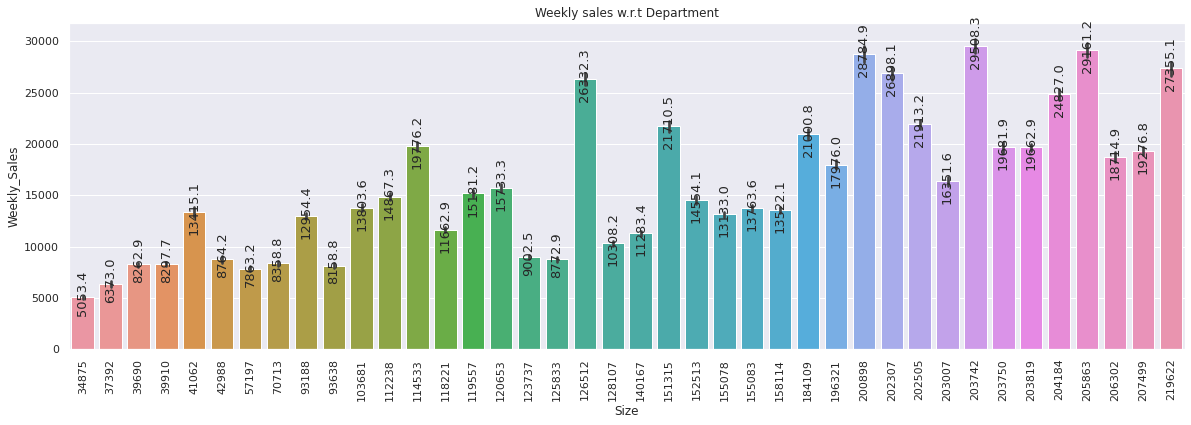

In [148]:
plt.figure(figsize=(20,6))
plt.title("Weekly sales w.r.t Department")
plt.xticks(rotation='vertical')
splot=sns.barplot(x='Size', y='Weekly_Sales', data=df_train)
annotate_vertical(splot)

#### Observation:

1. Weekly sales are higher for the stores which are larger in size to some extent but cannot be concluded exactly as certain stores with larger size has also recorded a less weekly sale.

In [149]:
df_train['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

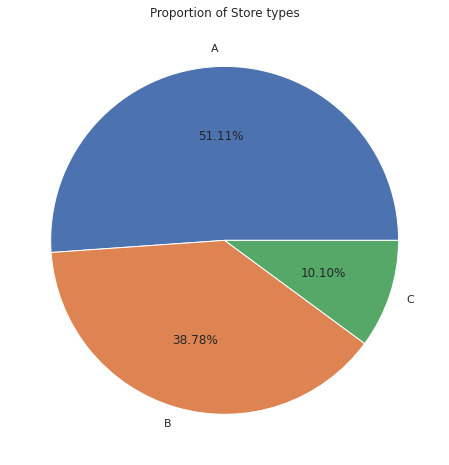

In [150]:
sums = df_train['Type'].value_counts()
plt.figure(figsize=(16,8))
#ax.axis('equal')
plt.title("Proportion of Store types")
plt.pie(sums, labels=sums.index,autopct='%1.2f%%');
plt.show()

#### Observation:

1. Stores are paritioned into 3 types. Type A, B, C.
2. Type A stores are larger in proportionate than Type B and C occupying 51%
3. Type B has the second largerst proportionate occupying 38% of the data.

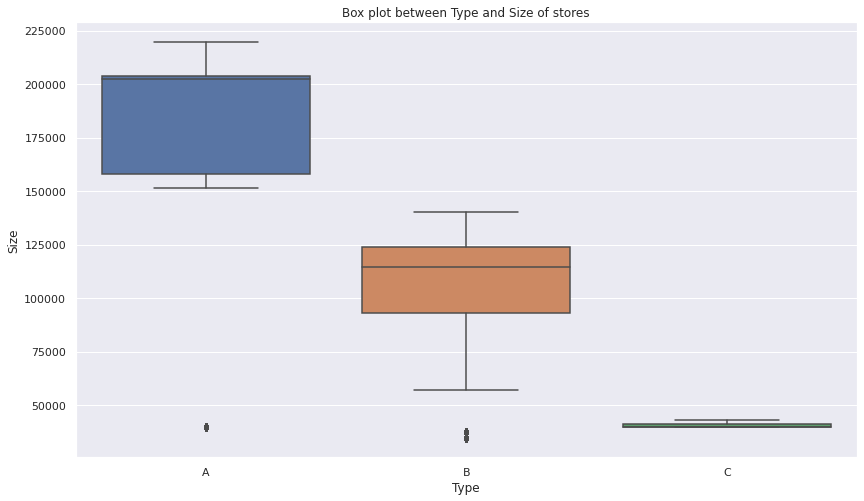

In [151]:
plt.figure(figsize=(14,8))
plt.title("Box plot between Type and Size of stores")
sns.boxplot(x='Type', y='Size',data=df_train)
plt.show()

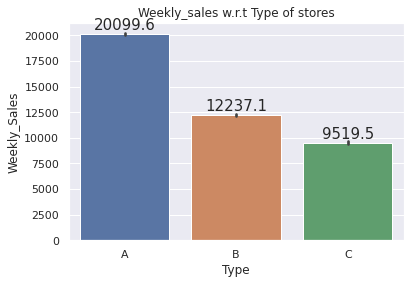

In [152]:
plt.title("Weekly_sales w.r.t Type of stores")
splot=sns.barplot(x='Type', y='Weekly_Sales', data=df_train)
annotate_horizontal(splot)

#### Observation:

1. Weekly sales are directly proportion to the count of store types. 
2. Type A stores are higher and the weekly sales are also higher in these stores.
3. Type C stores are lesser in count and the weeklys sales in these stores are also not high.
4. Size of Store types A, B, C is not overlapping. We can distinguish the stores with basic if-else. 
5. All the store size of > 150k can be classified as Store A and if size > 62 k and <  140k can be classified as Store B 
and rest as Store type C. 

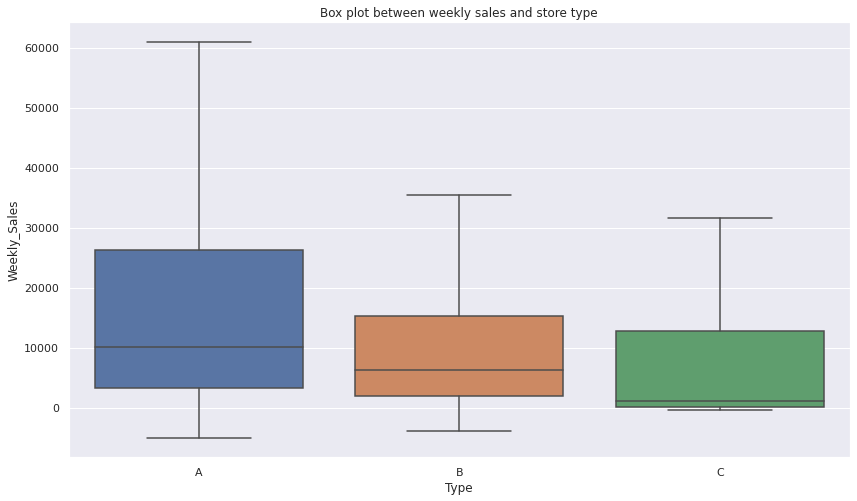

In [153]:
plt.figure(figsize=(14,8))
plt.title("Box plot between weekly sales and store type")
sns.boxplot(x='Type', y='Weekly_Sales',data=df_train,showfliers=False)
plt.show()

#### Observation:

1. Store type A has median greater than any other store types. 

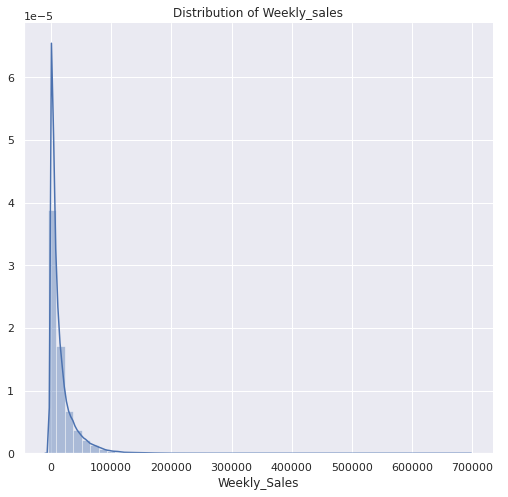

In [154]:
sns.FacetGrid(df_train, height=7).map(sns.distplot, "Weekly_Sales").add_legend();
plt.title("Distribution of Weekly_sales")
plt.show()

#### Observation:

1. 85% of the sales happened at around 10k. And is more likely representing the powerlaw distribution, as most of 80% of the sales are in the first 20% of the distribution. 

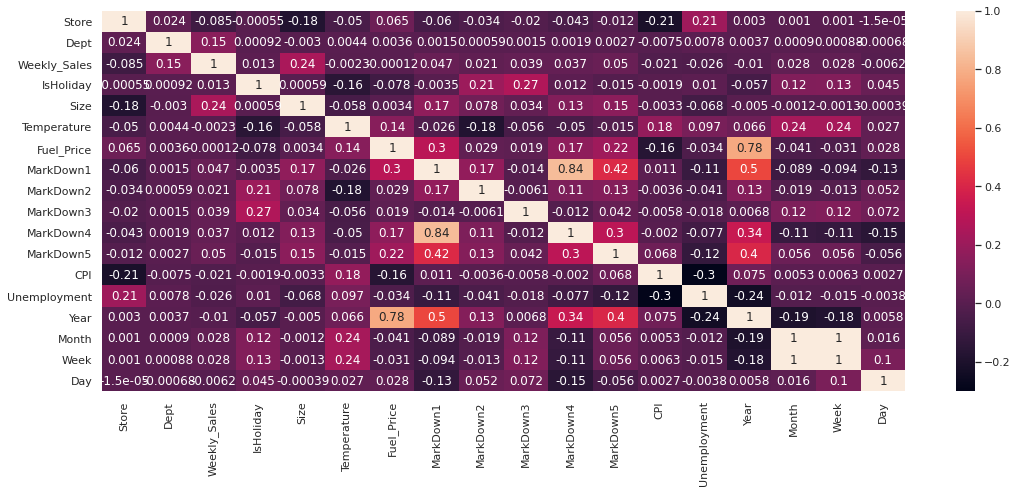

In [155]:
plt.figure(figsize=(18,7))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

#### Observation:

1. Though there is less correlation it is obvious that the unemployment index increase leads to the less shopping, and this goes with the Fuel_price as well.
2. Increase and decrease in temperature effects the sales. Lower tem and high temp can makes weekly sales go less.

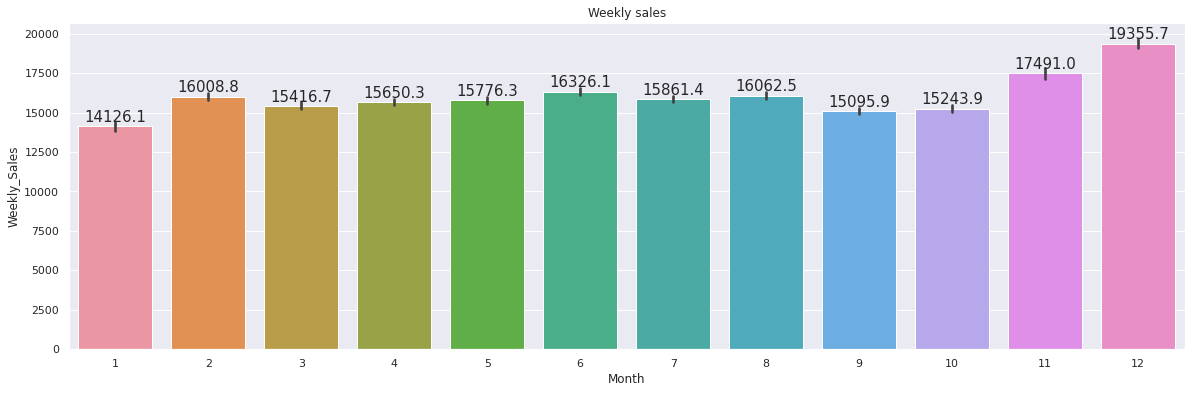

In [156]:
plt.figure(figsize=(20,6))
plt.title("Weekly sales")

splot=sns.barplot(x='Month', y='Weekly_Sales', data=df_train)

annotate_horizontal(splot)

#### Observation:

1. Dec, Nov months has slight higher sales. This may be because of the Thanksgiving day, Christmas season. 

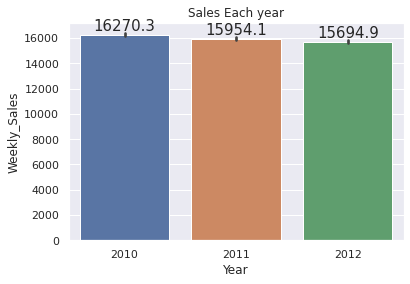

In [157]:
plt.title("Sales Each year")
splot=sns.barplot(df_train['Year'], df_train['Weekly_Sales'])
annotate_horizontal(splot)

#### Observation:

1. There is no difference in the average of sales throughout the given 3 years of data. Sales remain almost similar. 

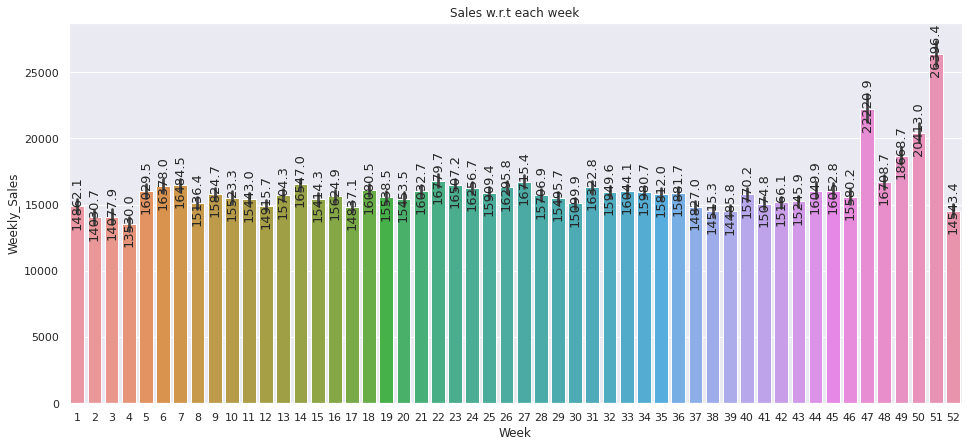

In [158]:
plt.figure(figsize=(16,7))
plt.title("Sales w.r.t each week")
splot=sns.barplot(x='Week', y='Weekly_Sales',data=df_train)
annotate_vertical(splot)

<AxesSubplot:title={'center':'Sales w.r.t each week'}, xlabel='Week', ylabel='Weekly_Sales'>

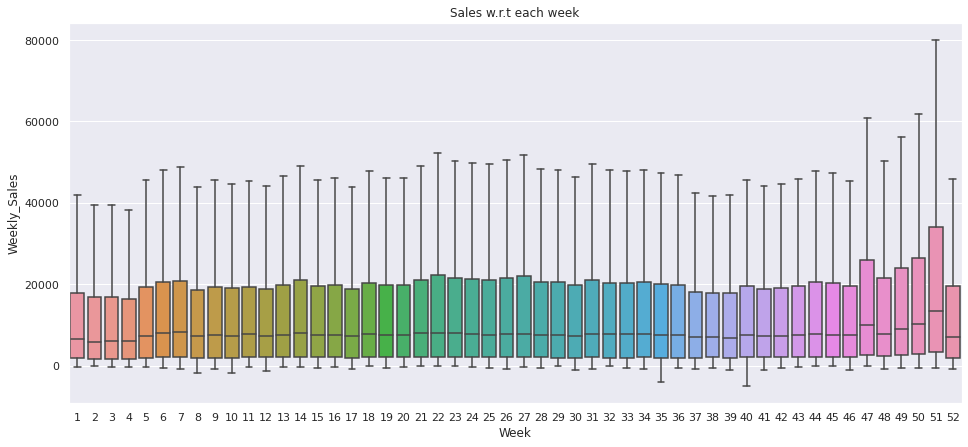

In [159]:
plt.figure(figsize=(16,7))
plt.title("Sales w.r.t each week")
sns.boxplot(x='Week', y='Weekly_Sales',data=df_train,showfliers=False)

#### Observation:

1. Sales in the 51st,47th week is significantly higher, and this is because of the Christmas days, Thanksgiving days respectively. 

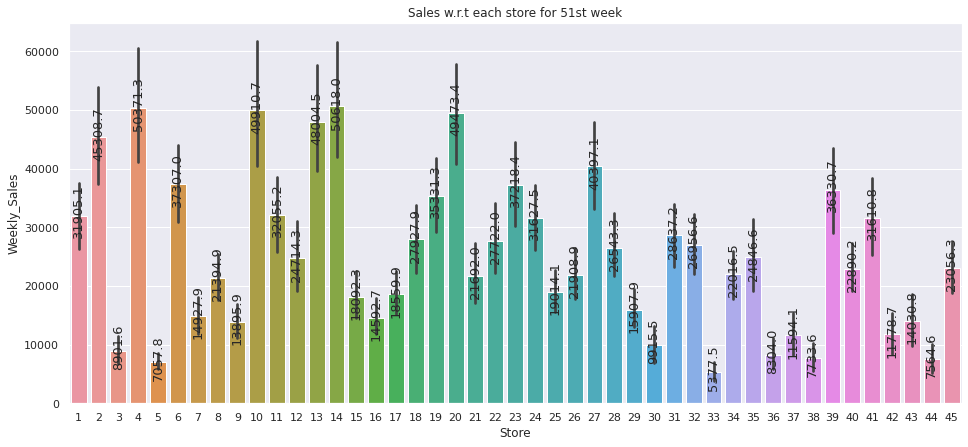

In [160]:
plt.figure(figsize=(16,7))
plt.title("Sales w.r.t each store for 51st week")
splot=sns.barplot(x=df_train['Store'],y=df_train['Weekly_Sales'][df_train['Week']==51])
annotate_vertical(splot)

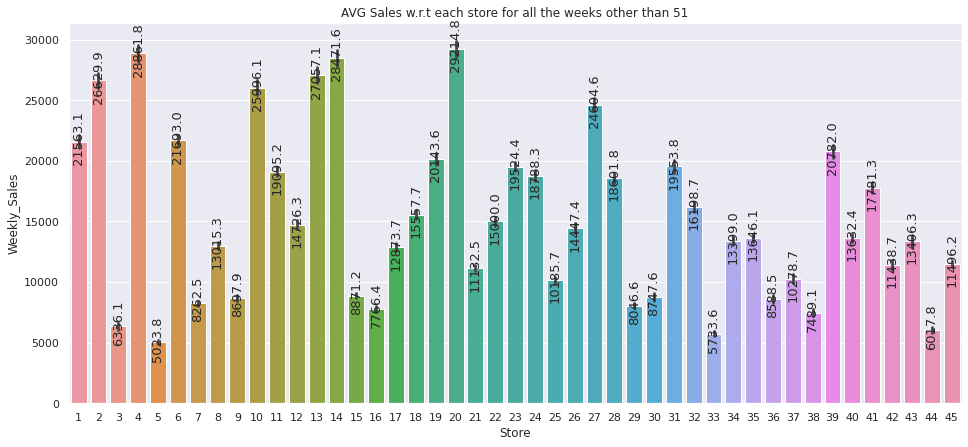

In [161]:
plt.figure(figsize=(16,7))
plt.title("AVG Sales w.r.t each store for all the weeks other than 51")
splot=sns.barplot(x=df_train['Store'],y=df_train['Weekly_Sales'][df_train['Week']!=51])
annotate_vertical(splot)

In [162]:
print("Avg sales of all the stores in 51st week is :",(np.mean(df_train['Weekly_Sales'][df_train['Week']==51].tolist())))
print("Avg weekly sales of all the stores except 51st week is :", (np.mean(df_train['Weekly_Sales'][df_train['Week']!=51].tolist())))

Avg sales of all the stores in 51st week is : 26396.39928296841
Avg weekly sales of all the stores except 51st week is : 15831.31649979427


#### Observation :

1. Weekly sales in all the stores in the week of 51 hiked up due to the christmas season.
2. Avg sales in all the stores in the remaining weeks being 158k dollars and the 51st week recorded 263k dollars  i.e: An increase of ~60% can be seen.

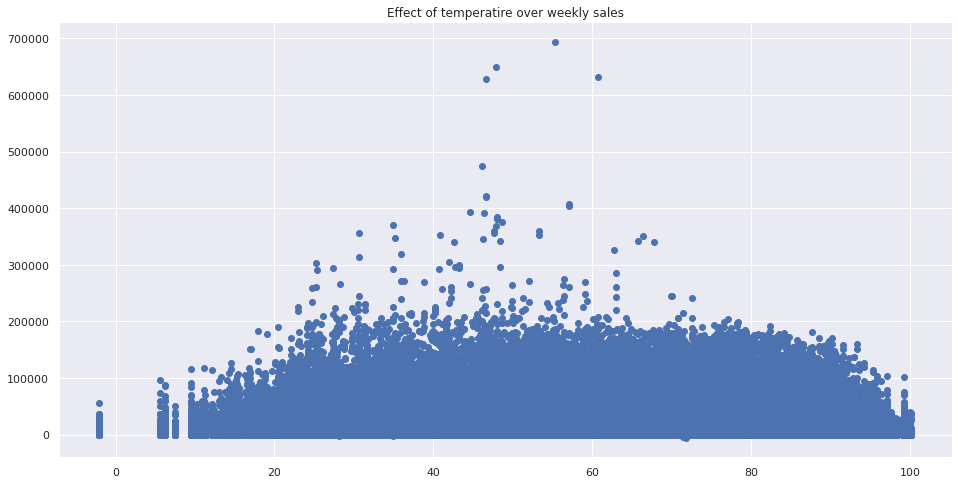

In [163]:
plt.figure(figsize=(16,8))
plt.scatter(df_train['Temperature'], df_train['Weekly_Sales'])
plt.title("Effect of temperatire over weekly sales")
plt.show()

#### Observation:

1. Average temperature ranges in  40-65 and the sales are higher in the mean temperatures. 
2. Sales has an effect in lower temperatures and > 90  degrees temp.

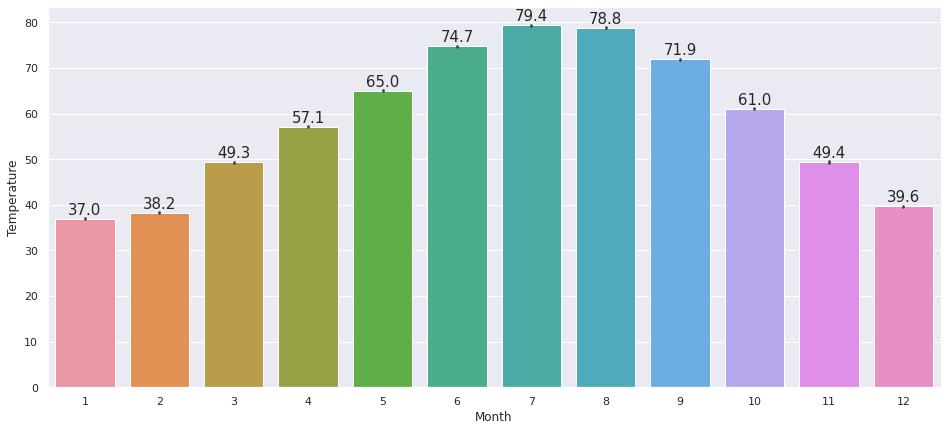

In [164]:
plt.figure(figsize=(16,7))

splot=sns.barplot(x='Month', y='Temperature',data=df_train)
annotate_horizontal(splot)

In [165]:
df_train[['Month','IsHoliday']][df_train['IsHoliday']==True].groupby(by='Month').count()

,IsHoliday
Month,
2,8895
9,8861
11,5959
12,5946


#### Observation:

1. The highest decrease of sales is in between 8th to 9th month that is because of the the temperature fall.
2. As the temperature increases the sales are increasing in most cases, but inversely the sales are increasing in the months of 11,12 th month inspite of the temperature decreasing because of the Holidays. 

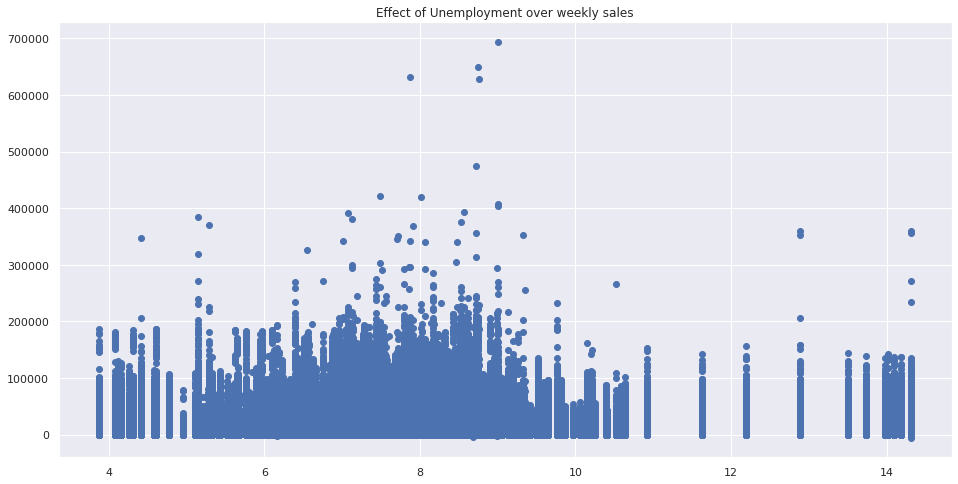

In [166]:
plt.figure(figsize=(16,8))
plt.scatter(df_train['Unemployment'], df_train['Weekly_Sales'])
plt.title("Effect of Unemployment over weekly sales")
plt.show()

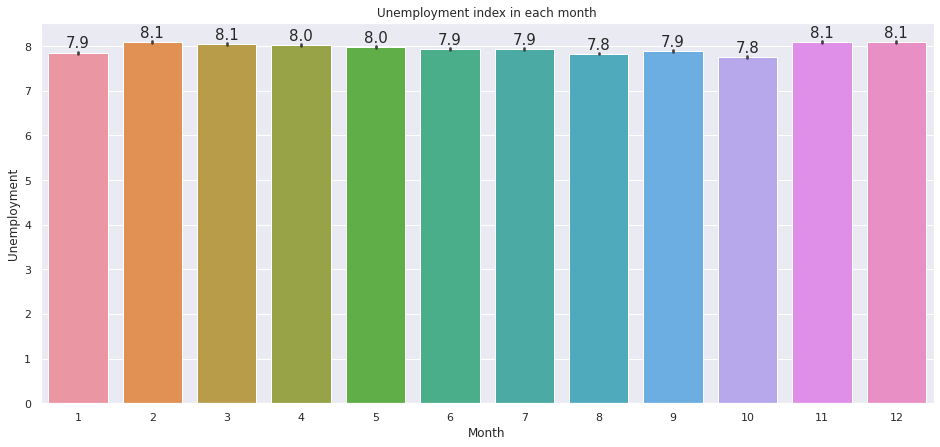

In [167]:
plt.figure(figsize=(16,7))
plt.title("Unemployment index in each month")
splot=sns.barplot(x='Month', y='Unemployment',data=df_train)
annotate_horizontal(splot)

#### Observation:

* Unemployment is almost similar in all the months. 
* Hence unemployment is not much affecting the weekly_sales. 
* Weekly Sales are not effected by unemployment. 

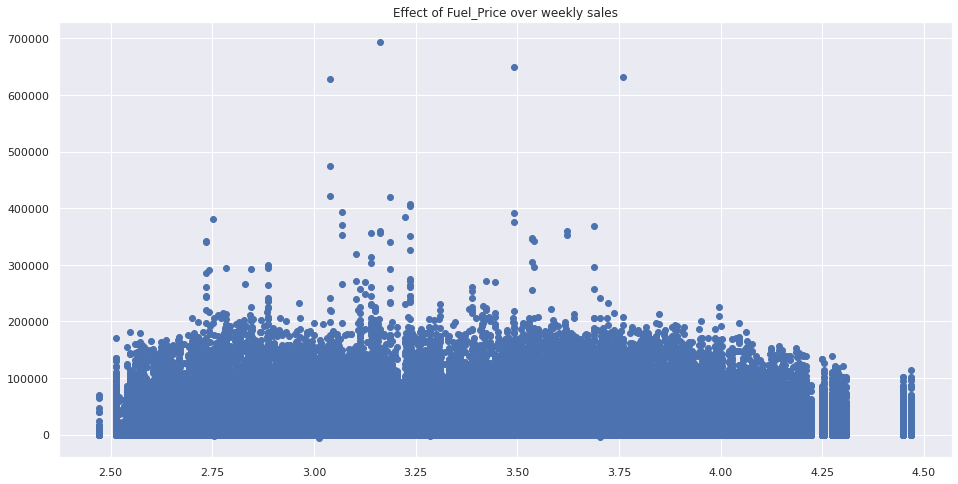

In [168]:
plt.figure(figsize=(16,8))
plt.scatter(df_train['Fuel_Price'], df_train['Weekly_Sales'])
plt.title("Effect of Fuel_Price over weekly sales")
plt.show()

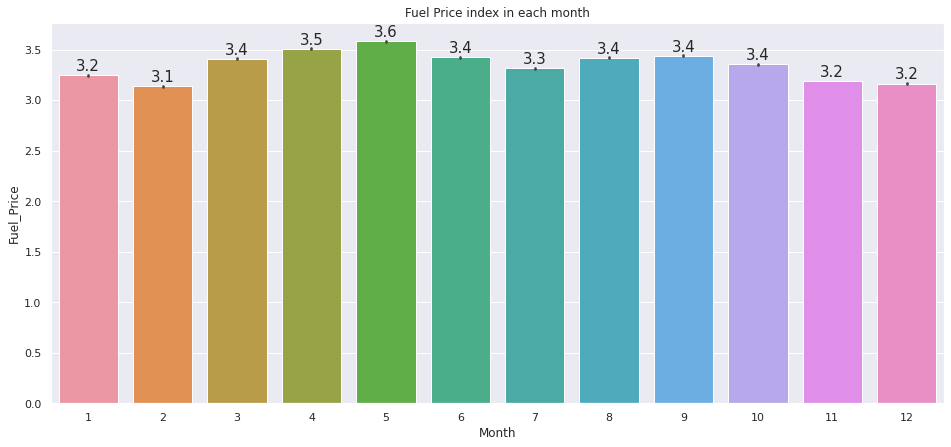

In [169]:
plt.figure(figsize=(16,7))
plt.title("Fuel Price index in each month")
splot=sns.barplot(x='Month', y='Fuel_Price',data=df_train)
annotate_horizontal(splot)

In [170]:
print("Avg sales of all the stores when the Fuel price is >3.25 :",(np.mean(df_train['Weekly_Sales'][df_train['Fuel_Price']>3.25].tolist())))
print("Avg sales of all the stores when the Fuel price is <3.25 :", (np.mean(df_train['Weekly_Sales'][df_train['Fuel_Price']<3.25].tolist())))

Avg sales of all the stores when the Fuel price is >3.25 : 15890.986434810764
Avg sales of all the stores when the Fuel price is <3.25 : 16112.978255254362


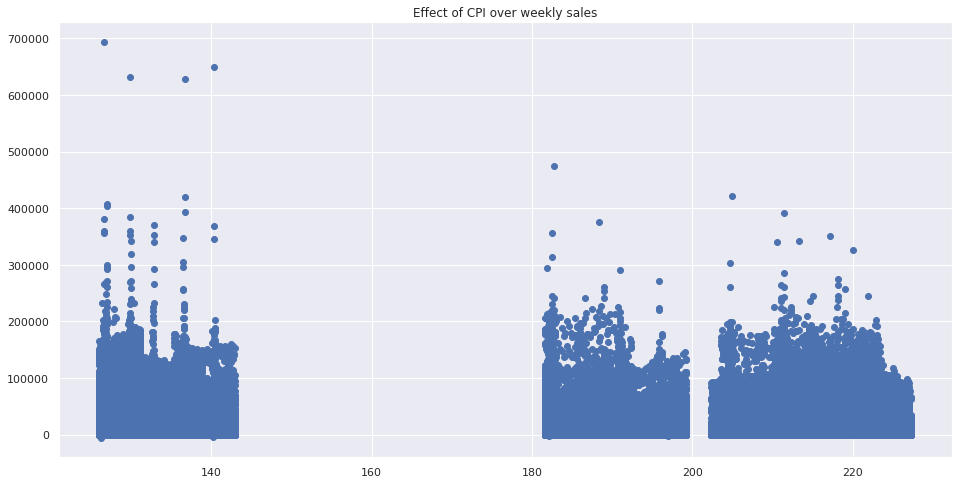

In [171]:
plt.figure(figsize=(16,8))
plt.scatter(df_train['CPI'], df_train['Weekly_Sales'])
plt.title("Effect of CPI over weekly sales")
plt.show()

#### Observation:

1. There is no continous data for the CPI index. There is no observed data with the CPI from 150-180. 
2. Weekly sales are slight higher as the CPI is in range of 210-225.

In [172]:
df_train.drop(columns=['Month','Date'],inplace = True)
column_date = df_test['Date']
df_test.drop(columns=['Month','Date'],inplace = True)

In [173]:
df_test.columns

Index(['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Week', 'Day'],
      dtype='object')

#### Label Encoding

In [174]:
var_mod = ['Type']
le = LabelEncoder()
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])

In [175]:
var_mod = ['Type']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [176]:
# Seperate Features and Target
X= df_train.drop(columns = ['Weekly_Sales'], axis=1)
y= df_train['Weekly_Sales']

In [177]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   Type          421570 non-null  int64  
 5   Size          421570 non-null  int64  
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Year          421570 non-null  int64  
 16  Week          421570 non-null  int64  
 17  Day           421570 non-null  int64  
dtypes: f

In [178]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   IsHoliday     115064 non-null  int64  
 3   Type          115064 non-null  int64  
 4   Size          115064 non-null  int64  
 5   Temperature   115064 non-null  float64
 6   Fuel_Price    115064 non-null  float64
 7   MarkDown1     115064 non-null  float64
 8   MarkDown2     115064 non-null  float64
 9   MarkDown3     115064 non-null  float64
 10  MarkDown4     115064 non-null  float64
 11  MarkDown5     115064 non-null  float64
 12  CPI           115064 non-null  float64
 13  Unemployment  115064 non-null  float64
 14  Year          115064 non-null  int64  
 15  Week          115064 non-null  int64  
 16  Day           115064 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 15.8 MB


In [179]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

## Step 5: Model Building

In [180]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [181]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 'RandomForestRegressor', 'XG Boost Regression']

rmse_list = []

In [182]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [183]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [184]:
evaluation

,Model,RMSE
0,Linear Regression,21670.394021
1,Ridge Regression,21670.394078
2,Lasso Regression,21670.425752
3,K Neighbors Regressor,19326.712008
4,Decision Tree Regressor,4625.751070
5,RandomForestRegressor,3477.635690
6,XG Boost Regression,5628.156670


It has been observed that Random Forest is performing better than others. Hence let's do forecasting on test dataset using Random Forest.

In [185]:
#RandomForest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
np.sqrt(mean_squared_error(y_valid, pred))

3439.7309434319345

In [186]:
pred1 = rf.predict(df_test)

In [187]:
df_test['Weekly_Sales'] = pred1

In [188]:
df_test.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Week,Day,Weekly_Sales
0,1,1,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,44,2,33236.6641
1,1,2,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,44,2,46869.3171
2,1,3,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,44,2,10806.3788
3,1,4,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,44,2,39855.3098
4,1,5,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,44,2,26962.9584


In [189]:
result = df_test[['Week','Weekly_Sales']]

In [190]:
forcasting = result[['Week','Weekly_Sales']].groupby(['Week']).sum().round().reset_index()

In [191]:
forcasting.head()

,Week,Weekly_Sales
0,1,43818302.0
1,2,42574492.0
2,3,42067722.0
3,4,41371732.0
4,5,45885707.0


In [192]:
forcasting.to_csv('submission.csv')